In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data from CSV file into a Pandas DataFrame
insurance = pd.read_csv('insurance.csv')

# Display the first few rows of the DataFrame
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Checking the size of the DataFrame
insurance.shape

(1338, 7)

In [4]:
# Statistical description of numerical values
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Display information about the DataFrame's data types and non-null values
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Checking for missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# checking for duplicate values
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# Removing duplicate values from the DataFrame
dF = insurance.drop_duplicates()

In [9]:
# Display the first few rows of the cleaned DataFrame
dF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


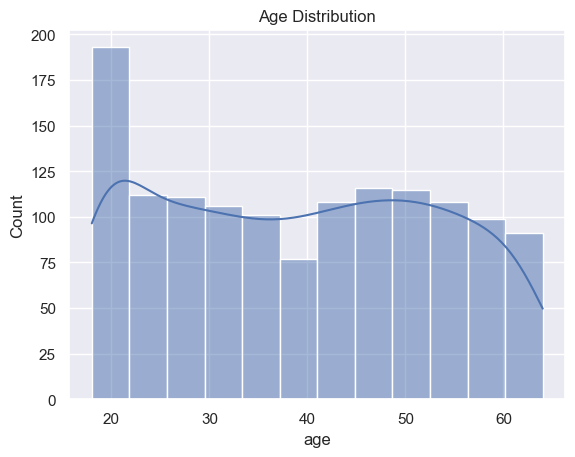

In [10]:
# Visualize the distribution of age using a histogram with KDE
sns.set()
sns.histplot(dF['age'], kde=True)
plt.title('Age Distribution')
plt.show()

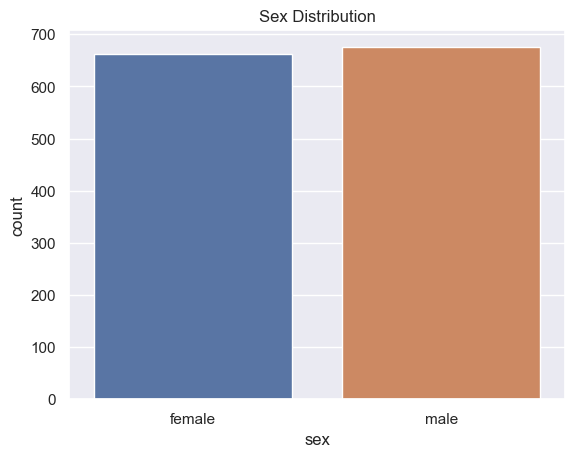

In [11]:
# Visualize the distribution of gender (sex)
sns.countplot(x='sex', data=dF)
plt.title('Sex Distribution')
plt.show()

In [12]:
# Display the count of each gender category
dF['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

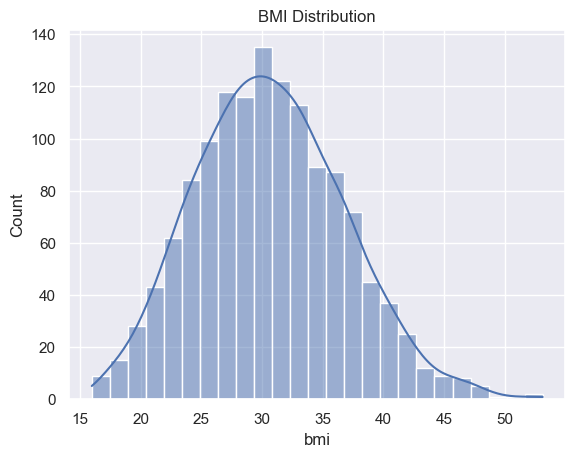

In [13]:
# Visualize the distribution of Body Mass Index (BMI)
sns.histplot(dF['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

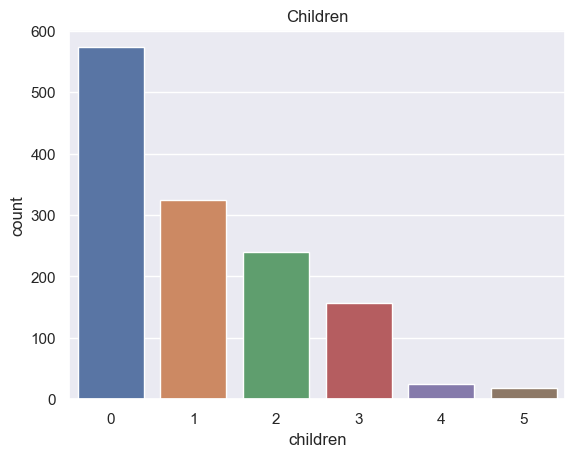

In [14]:
# Visualize the distribution of the number of children
sns.countplot(x='children', data=dF)
plt.title('Children')
plt.show()

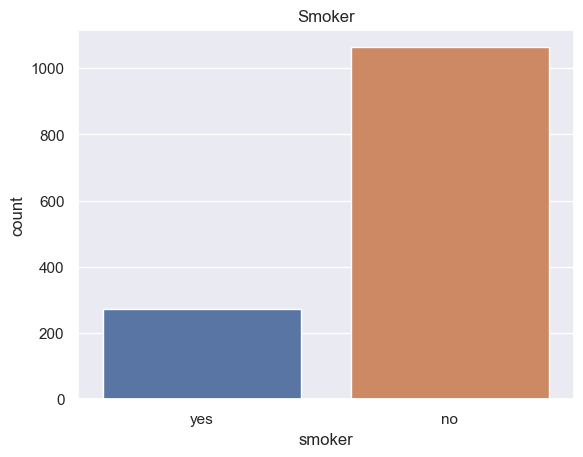

In [15]:
# Visualize the distribution of smokers
sns.countplot(x='smoker', data=dF)
plt.title('Smoker')
plt.show()

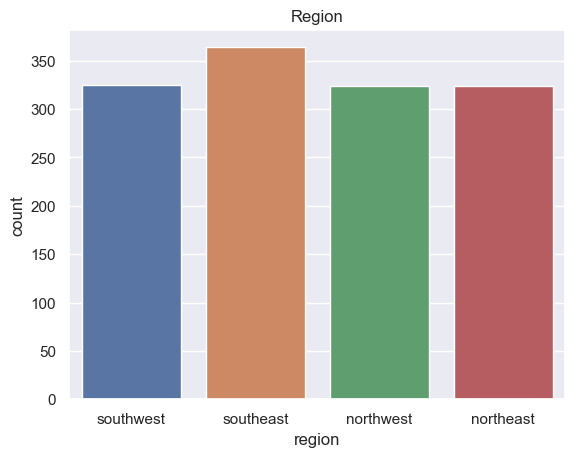

In [16]:
# Visualize the distribution of regions
sns.countplot(x='region', data=dF)
plt.title('Region')
plt.show()


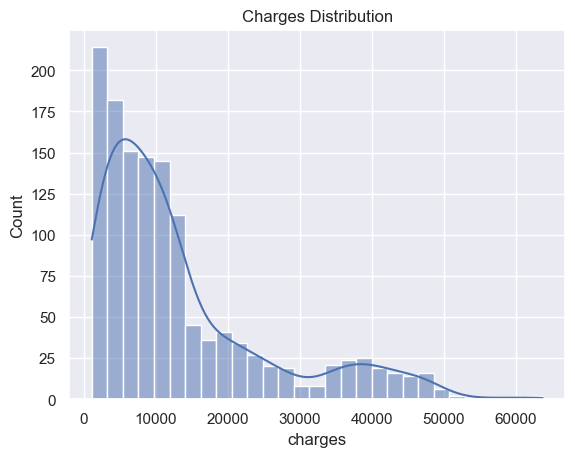

In [17]:
# Visualize the distribution of charges
sns.histplot(dF['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

In [18]:
# One-hot encoding the 'insurance' DataFrame to convert categorical features into binary dummy variables.
df = pd.get_dummies(data=dF, drop_first=True)

In [19]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


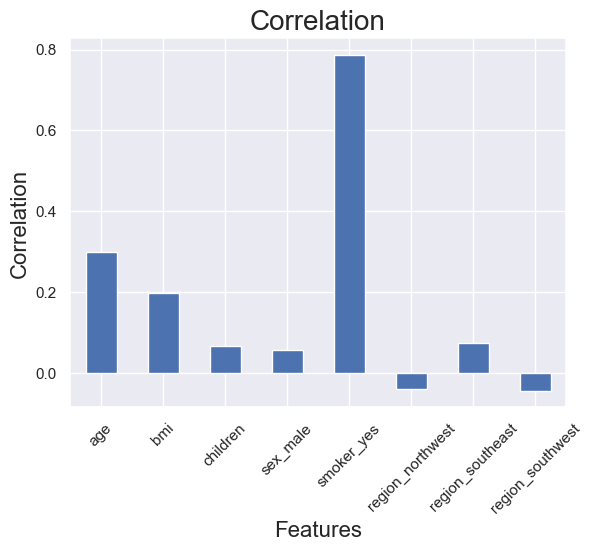

In [20]:
# Drop the 'charges' column for correlation analysis
df_ = df.drop(columns='charges')

# Calculate correlation with 'charges'
correlations = df_.corrwith(df['charges'])

# Create a bar plot to visualize correlations
correlations.plot.bar(title="Correlation", rot=45, grid=True)
plt.title("Correlation", fontsize=20)
plt.xlabel("Features", fontsize=16)
plt.ylabel("Correlation", fontsize=16)
plt.show()

<Axes: >

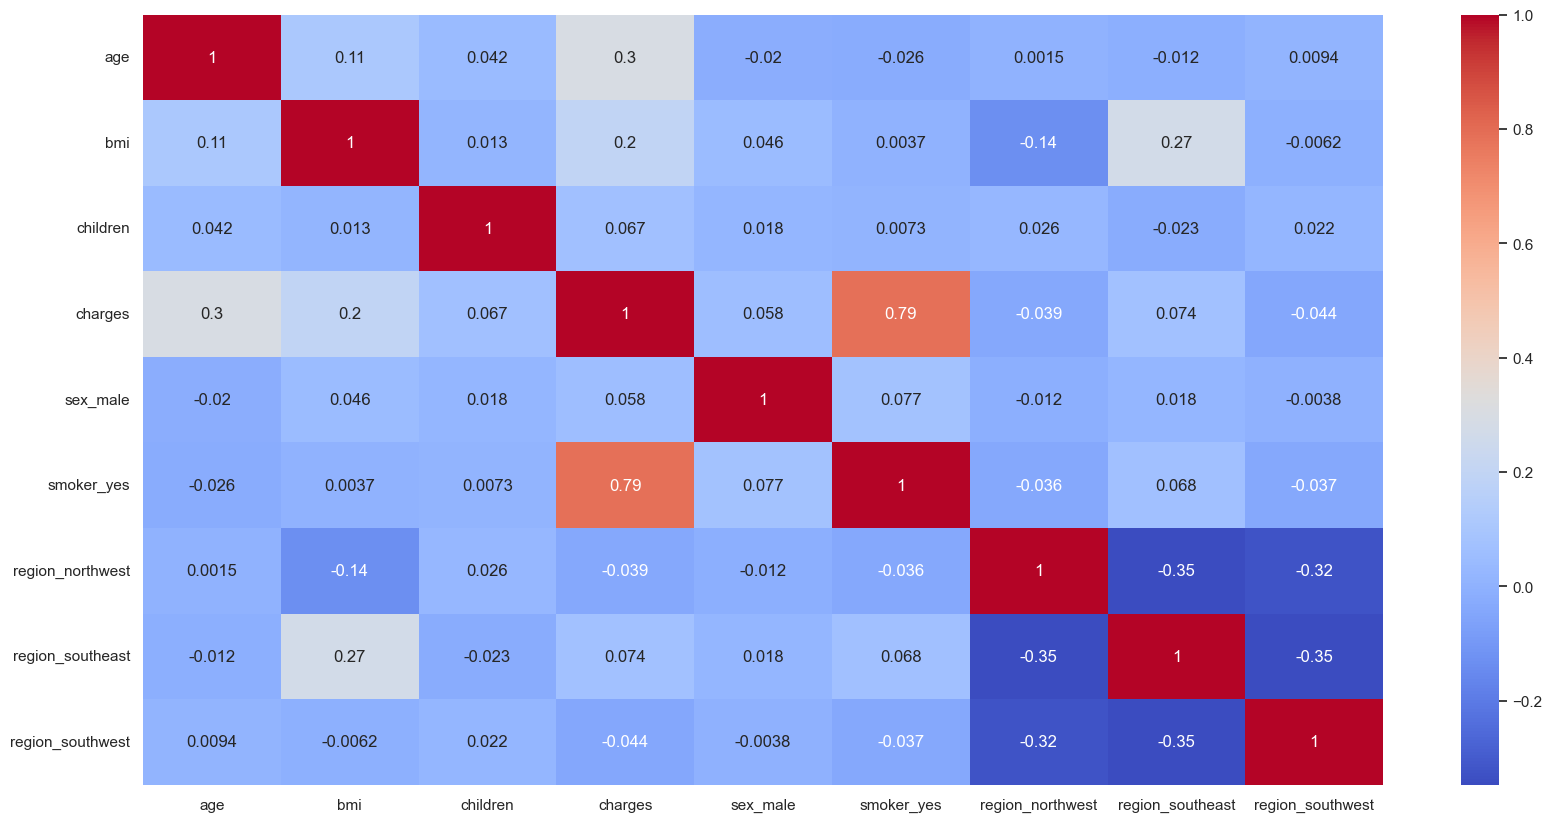

In [21]:
# Calculating the correlation matrix
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Splitting the data

In [22]:
# Splitting the data into training and testing sets
x = df.drop(columns='charges')
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1069, 8) (268, 8) (1069,) (268,)


# Scaling

In [23]:
# Scaling the features using StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
x_train, x_test

(array([[ 0.26227135, -1.76779252,  0.76684609, ..., -0.56834831,
         -0.60148436, -0.57843044],
        [-1.51041501,  0.60335531, -0.89763812, ..., -0.56834831,
          1.66255361, -0.57843044],
        [-1.15587773,  0.97258514,  0.76684609, ..., -0.56834831,
         -0.60148436, -0.57843044],
        ...,
        [-0.73043301,  1.07478268,  0.76684609, ..., -0.56834831,
          1.66255361, -0.57843044],
        [-1.43950755,  0.78467353, -0.89763812, ...,  1.75948442,
         -0.60148436, -0.57843044],
        [ 0.97134589, -0.71861936,  0.76684609, ..., -0.56834831,
         -0.60148436, -0.57843044]]),
 array([[-1.51041501,  1.49181459, -0.89763812, ..., -0.56834831,
          1.66255361, -0.57843044],
        [ 0.54590117, -0.23070851, -0.06539601, ..., -0.56834831,
          1.66255361, -0.57843044],
        [ 0.68771608,  0.09566429, -0.06539601, ..., -0.56834831,
         -0.60148436, -0.57843044],
        ...,
        [-1.51041501, -0.75653135,  0.76684609, ..., -

# Linear Regression

In [25]:
# Building and training a Linear Regression model
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [26]:
# Making predictions using the Linear Regression model
y_pred_lr = regressor_lr.predict(x_test)

In [27]:
# Checking the R-squared score of the Linear Regression model
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared score (Linear Regression):", r2_lr)

R-squared score (Linear Regression): 0.7530385567240127


# RandomForestRegressor

In [28]:
# Building and training a RandomForestRegressor model
regressor_rm = RandomForestRegressor()
regressor_rm.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
# Making predictions using the RandomForestRegressor model
y_pred_rm = regressor_rm.predict(x_test)

In [30]:
# Checking the R-squared score of the RandomForestRegressor model
r2_rm = r2_score(y_test, y_pred_rm)
print("R-squared score (Random Forest Regressor):", r2_rm)


R-squared score (Random Forest Regressor): 0.8379823243148056


# XGBRFRegressor

In [31]:
# Building and training an XGBRFRegressor model
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [32]:
# Making predictions using the XGBRFRegressor model
y_pred_xgb = regressor_xgb.predict(x_test)

In [33]:
# Checking the R-squared score of the XGBRFRegressor model
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R-squared score (XGBRF Regressor):", r2_xgb)

R-squared score (XGBRF Regressor): 0.8434243621627182


In [47]:
# Building a predictive system using user input
def get_user_input(prompt, data_type):
    while True:
        try:
            user_input = data_type(input(prompt))
            return user_input
        except ValueError:
            print("Invalid input. Please enter a valid value of type:", data_type)

def predict_insurance_cost(regressor_lr, regressor_rm, regressor_xgb):
    age = get_user_input("Enter age: ", int)
    bmi = get_user_input("Enter BMI: ", float)
    children = get_user_input("Enter number of children: ", int)
    sex_male = get_user_input("Enter sex (1 for male, 0 for female): ", int)
    smoker_yes = get_user_input("Smoker? (0 for yes, 1 for no): ", int)
    
    region_northwest = get_user_input("Enter region (0 for northeast, 1 for northwest): ", int)

    # Set values of other regions based on the selected region
    if region_northwest == 0:
        region_southeast = get_user_input("Enter region (0 for northeast, 1 for southeast): ", int)
        region_southwest = get_user_input("Enter region (0 for northeast, 1 for southwest): ", int)
    elif region_northwest == 1:
        region_southeast = 0
        region_southwest = 0
        
    input_data = (age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest)
    input_data_reshaped = np.asarray(input_data).reshape(1, -1)

    prediction_lr = regressor_lr.predict(sc.transform(input_data_reshaped))
    prediction_rm = regressor_rm.predict(sc.transform(input_data_reshaped))
    prediction_xgb = regressor_xgb.predict(sc.transform(input_data_reshaped))

    final_prediction = [prediction_lr, prediction_rm, prediction_xgb]

    return final_prediction

# Get and display the predicted insurance cost
predicted_cost = predict_insurance_cost(regressor_lr, regressor_rm, regressor_xgb)
print("Predicted insurance cost (Linear Regression): USD", predicted_cost[0])
print("Predicted insurance cost (Random Forest Regressor): USD", predicted_cost[1])
print("Predicted insurance cost (XGBRF Regressor): USD", predicted_cost[2])

Enter age: 20
Enter BMI: 19.87
Enter number of children: 0
Enter sex (1 for male, 0 for female): 1
Smoker? (0 for yes, 1 for no): 1
Enter region (0 for northeast, 1 for northwest): 1
Predicted insurance cost (Linear Regression): USD [23517.29778734]
Predicted insurance cost (Random Forest Regressor): USD [15113.8257523]
Predicted insurance cost (XGBRF Regressor): USD [15860.209]
